In [2]:
import tensorflow as tf 
from tensorflow import keras

In [3]:
print("tensorflow is version: ", tf.__version__) 
print("Keras is version: ", keras.__version__)

tensorflow is version:  2.9.2
Keras is version:  2.9.0


In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data() 

In [10]:
print('x_train_full shape: ', x_train_full.shape, 'x_train_full type: ', x_train_full.dtype) 
print('y_train_full shape: ', y_train_full.shape, 'y_train_full type: ', y_train_full.dtype) 
print('x_test shape: ', x_test.shape, 'x_test type: ', x_test.dtype) 
print('y_test shape:', y_test.shape, 'y_test type', y_test.dtype)

x_train_full shape:  (60000, 28, 28) x_train_full type:  uint8
y_train_full shape:  (60000,) y_train_full type:  uint8
x_test shape:  (10000, 28, 28) x_test type:  uint8
y_test shape: (10000,) y_test type uint8


In [11]:
x_valid, x_train = x_train_full[50000:] / 255.0, x_train_full[:50000] / 255.0
y_valid, y_train = y_train_full[50000:], y_train_full[:50000]

In [12]:
# Second method
model = keras.models.Sequential([ keras.layers.Flatten(input_shape=[28, 28]), 
                                  keras.layers.Dense(300, activation="relu"), 
                                  keras.layers.Dense(100, activation="relu"), 
                                  keras.layers.Dense(10, activation="softmax") ])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [17]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7333 - accuracy: 0.7601 - val_loss: 0.5325 - val_accuracy: 0.8152
Epoch 2/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4844 - accuracy: 0.8310 - val_loss: 0.4603 - val_accuracy: 0.8396
Epoch 3/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4435 - accuracy: 0.8456 - val_loss: 0.4535 - val_accuracy: 0.8368
Epoch 4/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4160 - accuracy: 0.8545 - val_loss: 0.4251 - val_accuracy: 0.8503
Epoch 5/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3976 - accuracy: 0.8606 - val_loss: 0.4165 - val_accuracy: 0.8527
Epoch 6/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3814 - accuracy: 0.8658 - val_loss: 0.3912 - val_accuracy: 0.8616
Epoch 7/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3689 - accuracy: 0.8700 - val_loss: 0.4083 - val_accuracy:

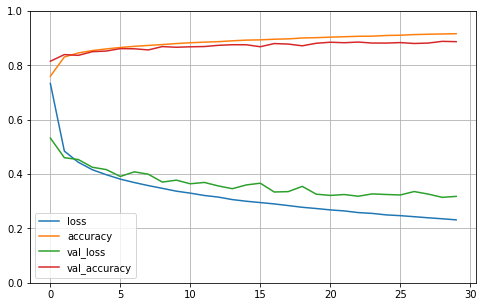

In [18]:
import pandas as pd 
import matplotlib.pyplot as plt 
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True) 
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1] 
plt.show()

In [19]:
model.evaluate(x_test/255, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3395 - accuracy: 0.8807


[0.3395448923110962, 0.8806999921798706]